In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use("ggplot")

**How does the raw dataset look like?**

In [46]:
df = pd.read_excel("../datafiles/Insy6500_Project_Dataset_Updated.xlsx")
df_raw = df.copy()
df.head()


,Scan No.,timestamp,Resistor R1 40C,Resistor R1 60C,Resistor R1 85C,Resistor R1 125C,Resistor R2 85C,Resistor R2 125C,Gain (Vout/Vin) 40C,Gain (Vout/Vin) 60C,Gain (Vout/Vin) 85C,Gain (Vout/Vin) 125C
0,1,11/23/2024 00:15:48:669,104.40363,109.50066,108.38533,104.59037,11.680190,10.020005,1.645716,1.748604,1.76,1.754837
1,2,11/23/2024 01:15:48:653,104.37421,109.44822,108.37254,104.51874,11.671119,9.469081,1.646289,1.742302,1.70,1.764511
2,3,11/23/2024 02:15:48:653,104.37932,109.41880,108.40708,104.48421,11.666136,9.570143,1.647146,1.738339,1.75,1.749867
3,4,11/23/2024 03:15:48:653,104.38828,109.41880,108.35463,104.49316,11.672141,9.740071,1.650871,1.735000,1.66,1.709196
4,5,11/23/2024 04:15:48:653,104.39595,109.41752,108.38149,104.51618,11.675208,9.832318,1.678576,1.732703,1.66,1.642838


**What is the memory consumed after data type correction?**

In [47]:
# Ensure timestamps are always parsed correctly
def fix_timestamp(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'], format="%m/%d/%Y %H:%M:%S:%f")
    return df

df_raw = fix_timestamp(df_raw)
df     = fix_timestamp(df)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Scan No.              5020 non-null   int64         
 1   timestamp             5020 non-null   datetime64[ns]
 2   Resistor R1 40C       5020 non-null   float64       
 3   Resistor R1 60C       5020 non-null   float64       
 4   Resistor R1 85C       5020 non-null   float64       
 5   Resistor R1 125C      5020 non-null   float64       
 6   Resistor R2 85C       5020 non-null   float64       
 7   Resistor R2 125C      5020 non-null   float64       
 8   Gain (Vout/Vin) 40C   5020 non-null   float64       
 9   Gain (Vout/Vin) 60C   5020 non-null   float64       
 10  Gain (Vout/Vin) 85C   5020 non-null   float64       
 11  Gain (Vout/Vin) 125C  5020 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 470.8 KB


**Answer: There is no categorical data. There is `timestamp` which is converted to `datetime` type and the dataset is consuming 470.8 KB.**

**Show the statistical values for the quantitative columns of the dataset**

In [49]:
df.iloc[:,2:].describe()

,Resistor R1 40C,Resistor R1 60C,Resistor R1 85C,Resistor R1 125C,Resistor R2 85C,Resistor R2 125C,Gain (Vout/Vin) 40C,Gain (Vout/Vin) 60C,Gain (Vout/Vin) 85C,Gain (Vout/Vin) 125C
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,105.866022,110.393064,110.430721,105.854359,11.991885,12.190270,1.743405,1.702695,1.751345,1.573656
std,2.018860,13.786043,2.279327,0.673905,0.652288,1.981193,0.036479,0.048238,0.064615,0.863065
min,104.161890,3.201034,108.091150,104.457350,10.951417,9.075053,1.583456,1.613115,1.590000,-2.872737
25%,104.535370,109.700190,108.402920,105.258060,11.432453,11.329698,1.715167,1.656534,1.700000,1.741475
50%,104.743850,110.614710,109.857510,105.692300,11.996218,11.716284,1.735366,1.722931,1.720000,1.778358
75%,107.055440,113.954620,111.227690,106.231420,12.324447,12.345145,1.779136,1.732372,1.820000,1.786052
max,130.185450,125.377480,124.684230,107.868600,14.384604,43.615198,2.036730,1.957846,1.870000,2.189626


**Is there any missing or null or negative values present in the dataset?**

In [50]:
df.isnull().sum()

Scan No.                0
timestamp               0
Resistor R1 40C         0
Resistor R1 60C         0
Resistor R1 85C         0
Resistor R1 125C        0
Resistor R2 85C         0
Resistor R2 125C        0
Gain (Vout/Vin) 40C     0
Gain (Vout/Vin) 60C     0
Gain (Vout/Vin) 85C     0
Gain (Vout/Vin) 125C    0
dtype: int64

In [51]:
(df._get_numeric_data() < 0).sum()


Scan No.                  0
Resistor R1 40C           0
Resistor R1 60C           0
Resistor R1 85C           0
Resistor R1 125C          0
Resistor R2 85C           0
Resistor R2 125C          0
Gain (Vout/Vin) 40C       0
Gain (Vout/Vin) 60C       0
Gain (Vout/Vin) 85C       0
Gain (Vout/Vin) 125C    210
dtype: int64

**Answer: The dataset has 210 negative values in Gain (Vout/Vin) 125C column.**

**Show the statistical behavior of Resistor R1 and Gain.**

In [52]:
df[['Resistor R1 40C','Resistor R1 60C','Resistor R1 85C','Resistor R1 125C']].describe()

,Resistor R1 40C,Resistor R1 60C,Resistor R1 85C,Resistor R1 125C
count,5020.000000,5020.000000,5020.000000,5020.000000
mean,105.866022,110.393064,110.430721,105.854359
std,2.018860,13.786043,2.279327,0.673905
min,104.161890,3.201034,108.091150,104.457350
25%,104.535370,109.700190,108.402920,105.258060
50%,104.743850,110.614710,109.857510,105.692300
75%,107.055440,113.954620,111.227690,106.231420
max,130.185450,125.377480,124.684230,107.868600


In [53]:
df[['Gain (Vout/Vin) 40C','Gain (Vout/Vin) 60C','Gain (Vout/Vin) 85C','Gain (Vout/Vin) 125C']].describe()

,Gain (Vout/Vin) 40C,Gain (Vout/Vin) 60C,Gain (Vout/Vin) 85C,Gain (Vout/Vin) 125C
count,5020.000000,5020.000000,5020.000000,5020.000000
mean,1.743405,1.702695,1.751345,1.573656
std,0.036479,0.048238,0.064615,0.863065
min,1.583456,1.613115,1.590000,-2.872737
25%,1.715167,1.656534,1.700000,1.741475
50%,1.735366,1.722931,1.720000,1.778358
75%,1.779136,1.732372,1.820000,1.786052
max,2.036730,1.957846,1.870000,2.189626


In [54]:
df_raw[['Resistor R1 40C',
        'Resistor R1 60C',
        'Resistor R1 85C',
        'Resistor R1 125C']].min()


Resistor R1 40C     104.161890
Resistor R1 60C       3.201034
Resistor R1 85C     108.091150
Resistor R1 125C    104.457350
dtype: float64

In [55]:
df_raw[['Resistor R2 85C',
        'Resistor R2 125C']].min()


Resistor R2 85C     10.951417
Resistor R2 125C     9.075053
dtype: float64

**Remove outliers or unexpected values in any column.**

In [56]:
df = df_raw.copy()

gain_cols = [
    'Gain (Vout/Vin) 40C','Gain (Vout/Vin) 60C',
    'Gain (Vout/Vin) 85C','Gain (Vout/Vin) 125C'
]

res_cols = [
    'Resistor R1 40C','Resistor R1 60C','Resistor R1 85C','Resistor R1 125C',
    'Resistor R2 85C','Resistor R2 125C'
]

# 1. Remove negative values
df[gain_cols] = df[gain_cols].where(df[gain_cols] >= 0, np.nan)
df[res_cols] = df[res_cols].where(df[res_cols] >= 0, np.nan)

# 2. First interpolation
df[gain_cols] = df[gain_cols].interpolate(method='linear', limit_direction='both')
df[res_cols] = df[res_cols].interpolate(method='linear', limit_direction='both')

# 3. Remove outliers in resistance columns
for col in res_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 3 * IQR     
    upper = Q3 + 3 * IQR
    df[col] = df[col].where((df[col] >= lower) & (df[col] <= upper))

# 4. Remove outliers in gain columns
for col in gain_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 3 * IQR
    upper = Q3 + 3 * IQR
    df[col] = df[col].where((df[col] >= lower) & (df[col] <= upper))

# 5. Interpolate again to fill NaNs created by outlier removal
df[res_cols] = df[res_cols].interpolate(method='linear', limit_direction='both')
df[gain_cols] = df[gain_cols].interpolate(method='linear', limit_direction='both')


**Answer: So for this dataset, the data has been acquired using data acquisition system, for the circuit I have used, the gain is always positive. However, specially for gain at 125C there is too many data with negative gain. Data acquisition system can also measure noise data or unwanted data. The negative gains are not sustained for long time. This is random. So this might impact the analysis. For this reason, the negative data has been replaced with `nan` values and then linear interpolation have been used to replace `nan` values with the average of prior and next data of the `nan` values. And also there can be outlier's which actually presents the data which are noises rather than actual data. So using IQR or interquartile range method this outliers can be removed.**

In [58]:
df.isna().sum()


Scan No.                0
timestamp               0
Resistor R1 40C         0
Resistor R1 60C         0
Resistor R1 85C         0
Resistor R1 125C        0
Resistor R2 85C         0
Resistor R2 125C        0
Gain (Vout/Vin) 40C     0
Gain (Vout/Vin) 60C     0
Gain (Vout/Vin) 85C     0
Gain (Vout/Vin) 125C    0
dtype: int64

**Show the degradation R1 resistor i.e. the change in resistance from initial value.**

In [59]:
for col in ['Resistor R1 40C','Resistor R1 60C','Resistor R1 85C','Resistor R1 125C']:
    df[col + "_delta"] = abs(df[col] - df[col].iloc[0])

df.head()


,Scan No.,timestamp,Resistor R1 40C,Resistor R1 60C,Resistor R1 85C,Resistor R1 125C,Resistor R2 85C,Resistor R2 125C,Gain (Vout/Vin) 40C,Gain (Vout/Vin) 60C,Gain (Vout/Vin) 85C,Gain (Vout/Vin) 125C,Resistor R1 40C_delta,Resistor R1 60C_delta,Resistor R1 85C_delta,Resistor R1 125C_delta
0,1,2024-11-23 00:15:48.669,104.40363,109.50066,108.38533,104.59037,11.680190,10.020005,1.645716,1.748604,1.76,1.754837,0.00000,0.00000,0.00000,0.00000
1,2,2024-11-23 01:15:48.653,104.37421,109.44822,108.37254,104.51874,11.671119,9.469081,1.646289,1.742302,1.70,1.764511,0.02942,0.05244,0.01279,0.07163
2,3,2024-11-23 02:15:48.653,104.37932,109.41880,108.40708,104.48421,11.666136,9.570143,1.647146,1.738339,1.75,1.749867,0.02431,0.08186,0.02175,0.10616
3,4,2024-11-23 03:15:48.653,104.38828,109.41880,108.35463,104.49316,11.672141,9.740071,1.650871,1.735000,1.66,1.709196,0.01535,0.08186,0.03070,0.09721
4,5,2024-11-23 04:15:48.653,104.39595,109.41752,108.38149,104.51618,11.675208,9.832318,1.678576,1.732703,1.66,1.642838,0.00768,0.08314,0.00384,0.07419


**Show the R1 resistor behavior over aging time**

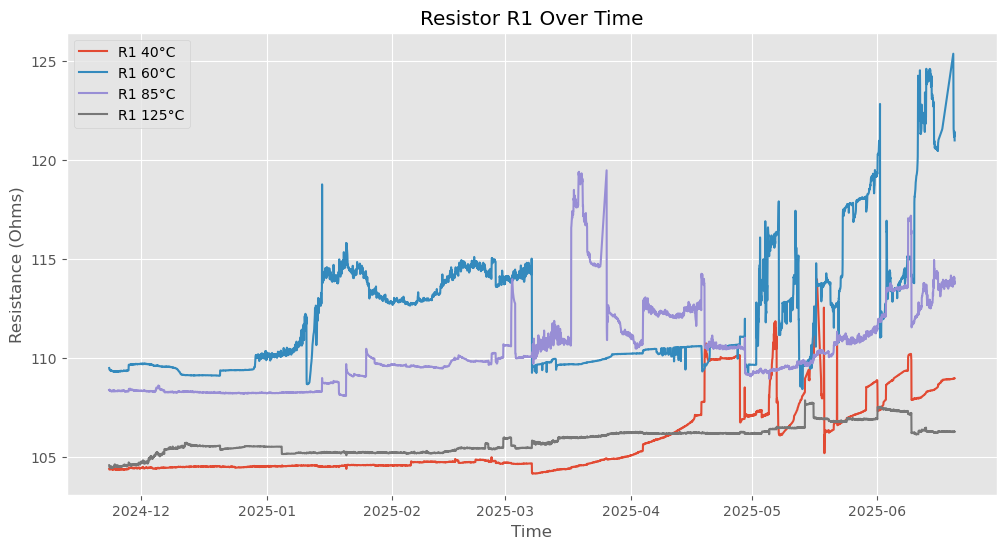

In [61]:
plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], df['Resistor R1 40C'], label='R1 40°C')
plt.plot(df['timestamp'], df['Resistor R1 60C'], label='R1 60°C')
plt.plot(df['timestamp'], df['Resistor R1 85C'], label='R1 85°C')
plt.plot(df['timestamp'], df['Resistor R1 125C'], label='R1 125°C')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Resistance (Ohms)")
plt.title("Resistor R1 Over Time")
plt.show()


In [62]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%m/%d/%Y %H:%M:%S:%f")
df['hours_since_start'] = (df['timestamp'] - df['timestamp'].min()) / pd.Timedelta(hours=1)


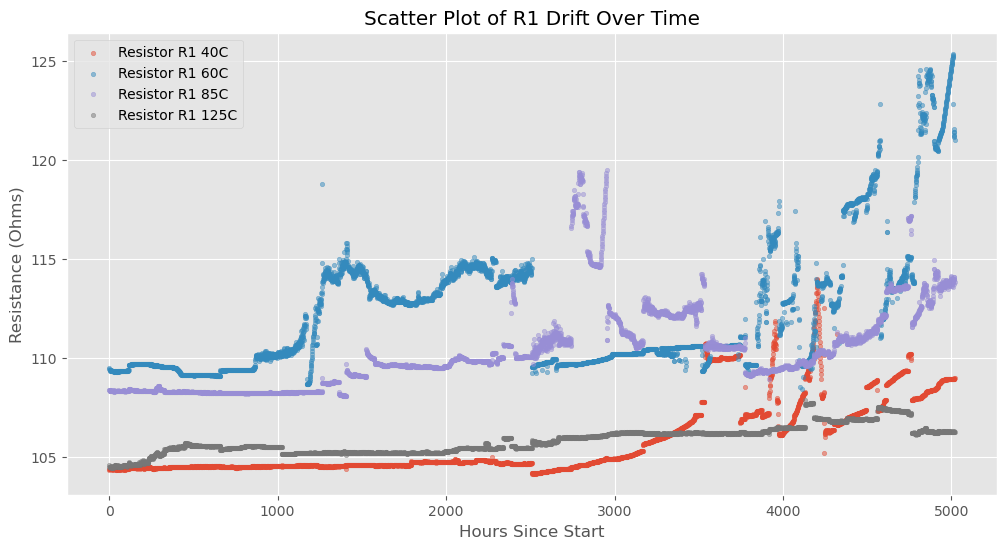

In [63]:
plt.figure(figsize=(12,6))

for col in ['Resistor R1 40C','Resistor R1 60C','Resistor R1 85C','Resistor R1 125C']:
    plt.scatter(df['hours_since_start'], df[col], s=10, alpha=0.5, label=col)

plt.legend()
plt.xlabel("Hours Since Start")
plt.ylabel("Resistance (Ohms)")
plt.title("Scatter Plot of R1 Drift Over Time")
plt.show()


**The degradation of R1 has been shown over time by using normal plot and scatter plot.**

**Show the R2 resistor behavior over aging time.**

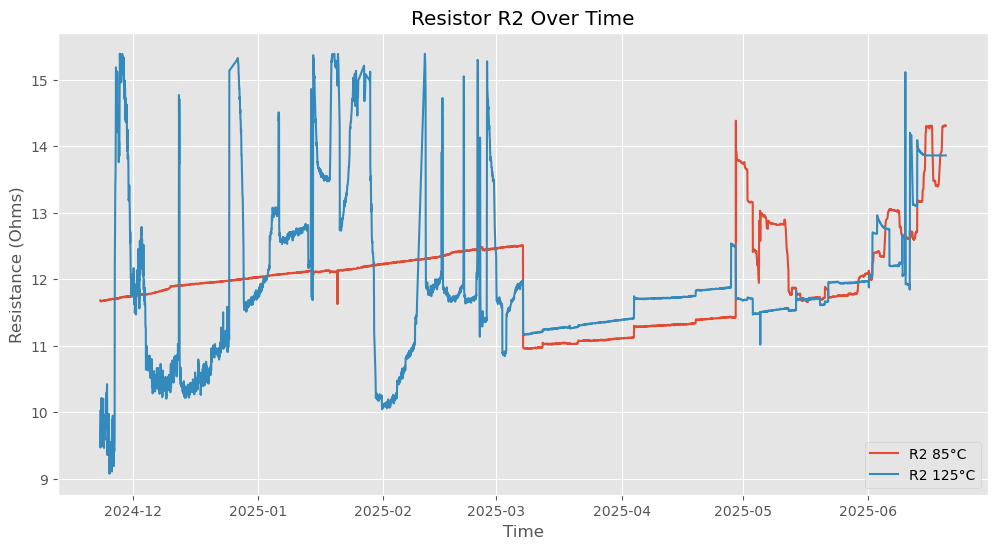

In [64]:
plt.figure(figsize=(12,6))

plt.plot(df['timestamp'], df['Resistor R2 85C'], label='R2 85°C')
plt.plot(df['timestamp'], df['Resistor R2 125C'], label='R2 125°C')

plt.legend()
plt.xlabel("Time")
plt.ylabel("Resistance (Ohms)")
plt.title("Resistor R2 Over Time")
plt.show()


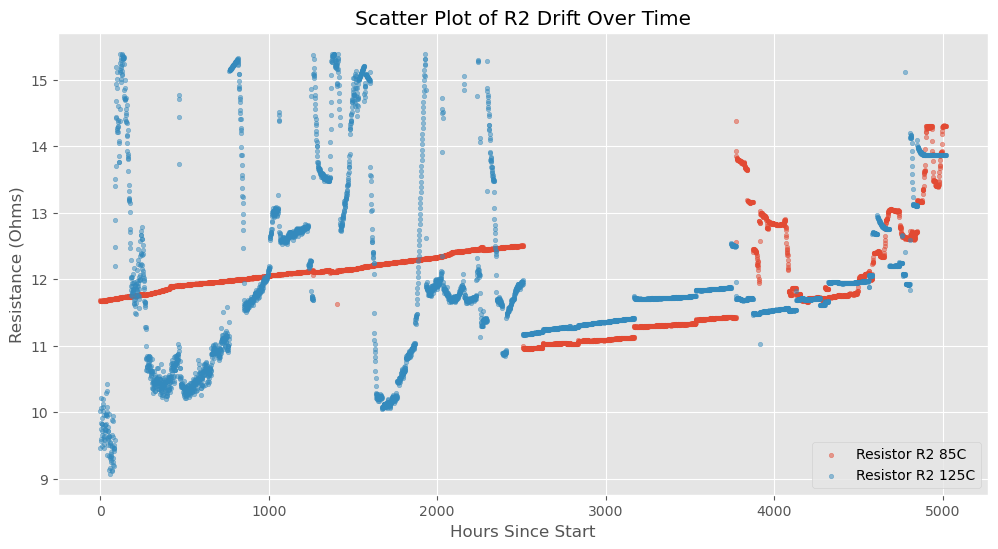

In [65]:
plt.figure(figsize=(12,6))

for col in ['Resistor R2 85C', 'Resistor R2 125C']:
    plt.scatter(df['hours_since_start'], df[col], s=10, alpha=0.5, label=col)

plt.legend()
plt.xlabel("Hours Since Start")
plt.ylabel("Resistance (Ohms)")
plt.title("Scatter Plot of R2 Drift Over Time")
plt.show()


**The degradation of R2 has been shown over time by using normal plot and scatter plot.**

**Show the Gain behavior over aging time.**

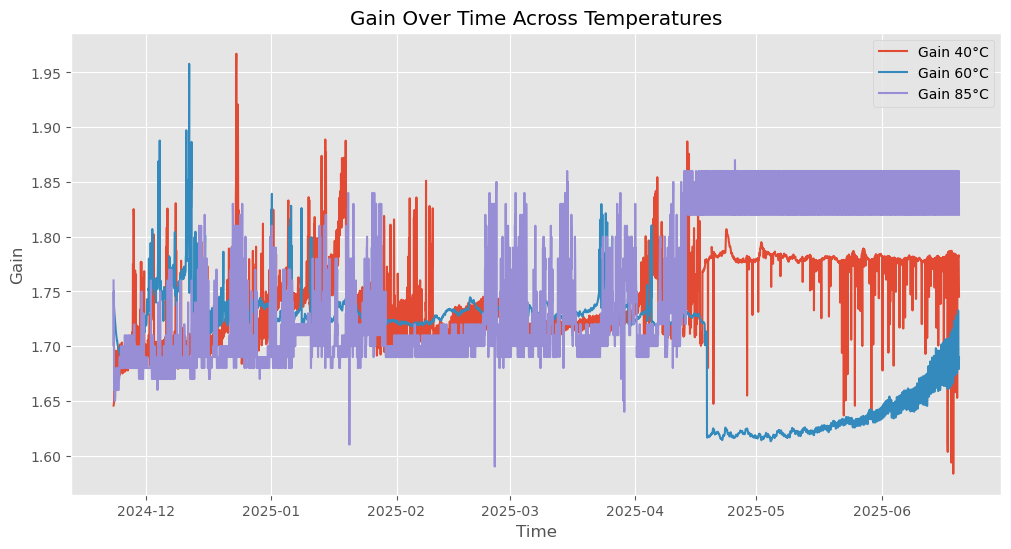

In [66]:
plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], df['Gain (Vout/Vin) 40C'], label='Gain 40°C')
plt.plot(df['timestamp'], df['Gain (Vout/Vin) 60C'], label='Gain 60°C')
plt.plot(df['timestamp'], df['Gain (Vout/Vin) 85C'], label='Gain 85°C')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Gain")
plt.title("Gain Over Time Across Temperatures")
plt.show()


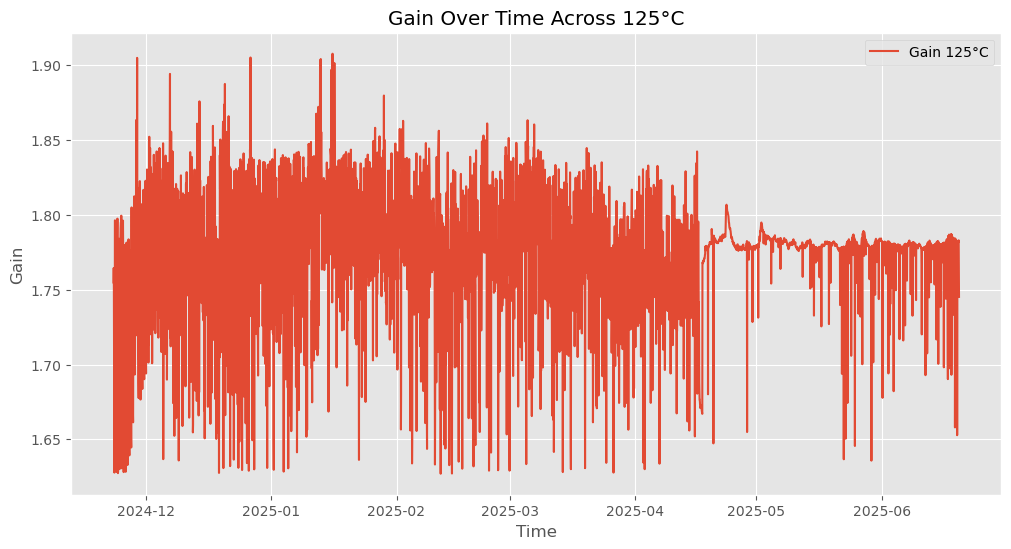

In [67]:
plt.figure(figsize=(12,6))
plt.plot(df['timestamp'], df['Gain (Vout/Vin) 125C'], label='Gain 125°C')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Gain")
plt.title("Gain Over Time Across 125°C")
plt.show()

**The degradation of Gain been shown over time by using normal plot and scatter plot. The gain behavior at 125C is very random. Even after outlier removal, it has too many deviation. Which actually indicates that the circuit is not stable at 125C.**

**Show the histplot for R1, R2 and Gain.**

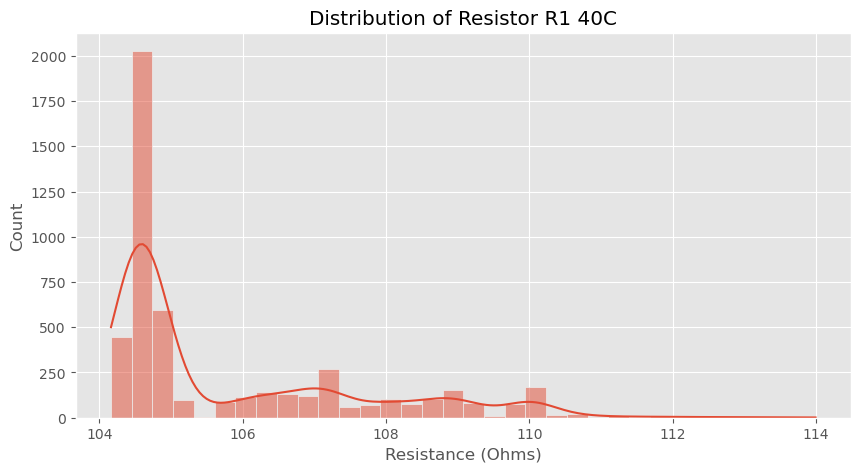

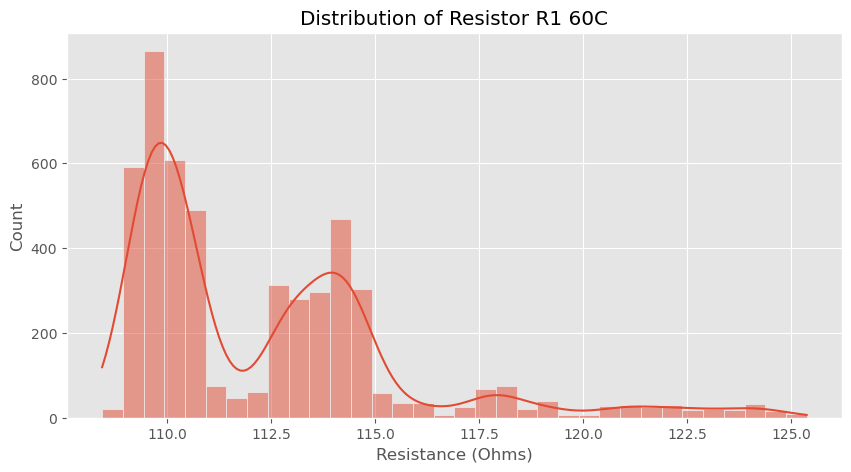

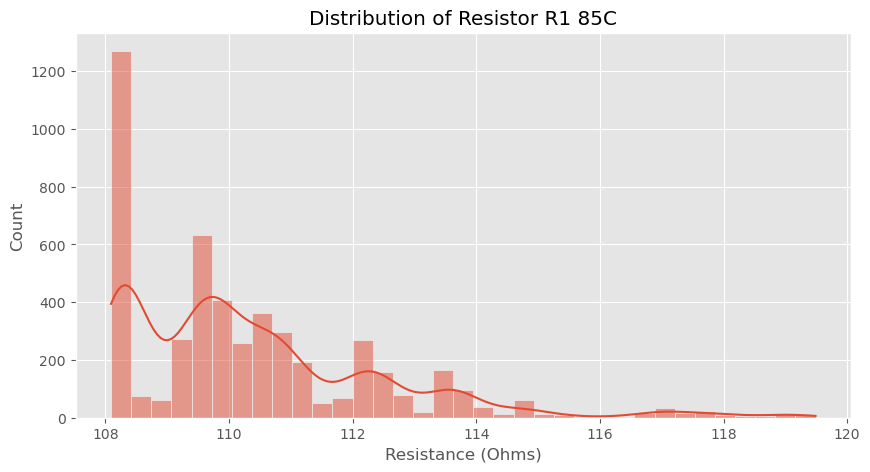

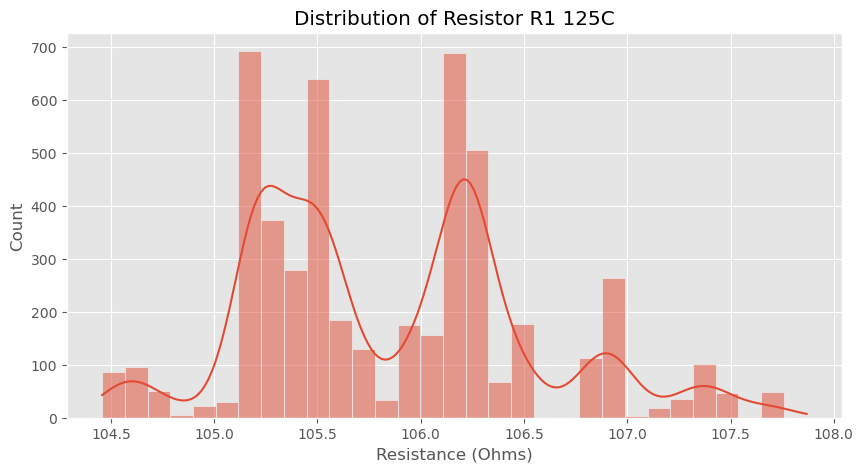

In [68]:
temps = ['Resistor R1 40C', 'Resistor R1 60C', 'Resistor R1 85C', 'Resistor R1 125C']

for col in temps:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Resistance (Ohms)")
    plt.ylabel("Count")
    plt.show()


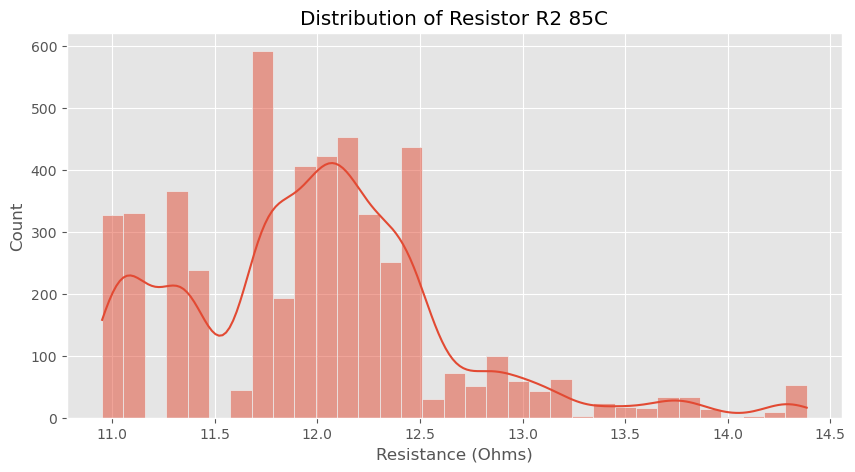

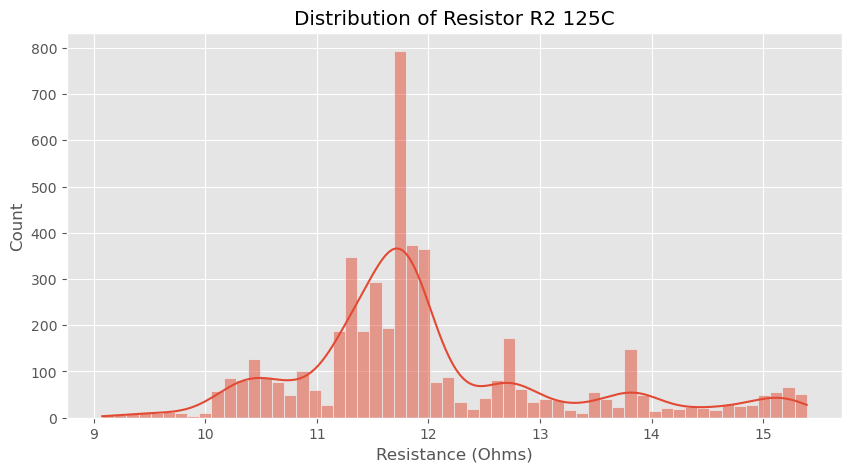

In [69]:
temps_r2 = ['Resistor R2 85C', 'Resistor R2 125C']

for col in temps_r2:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Resistance (Ohms)")
    plt.ylabel("Count")
    plt.show()


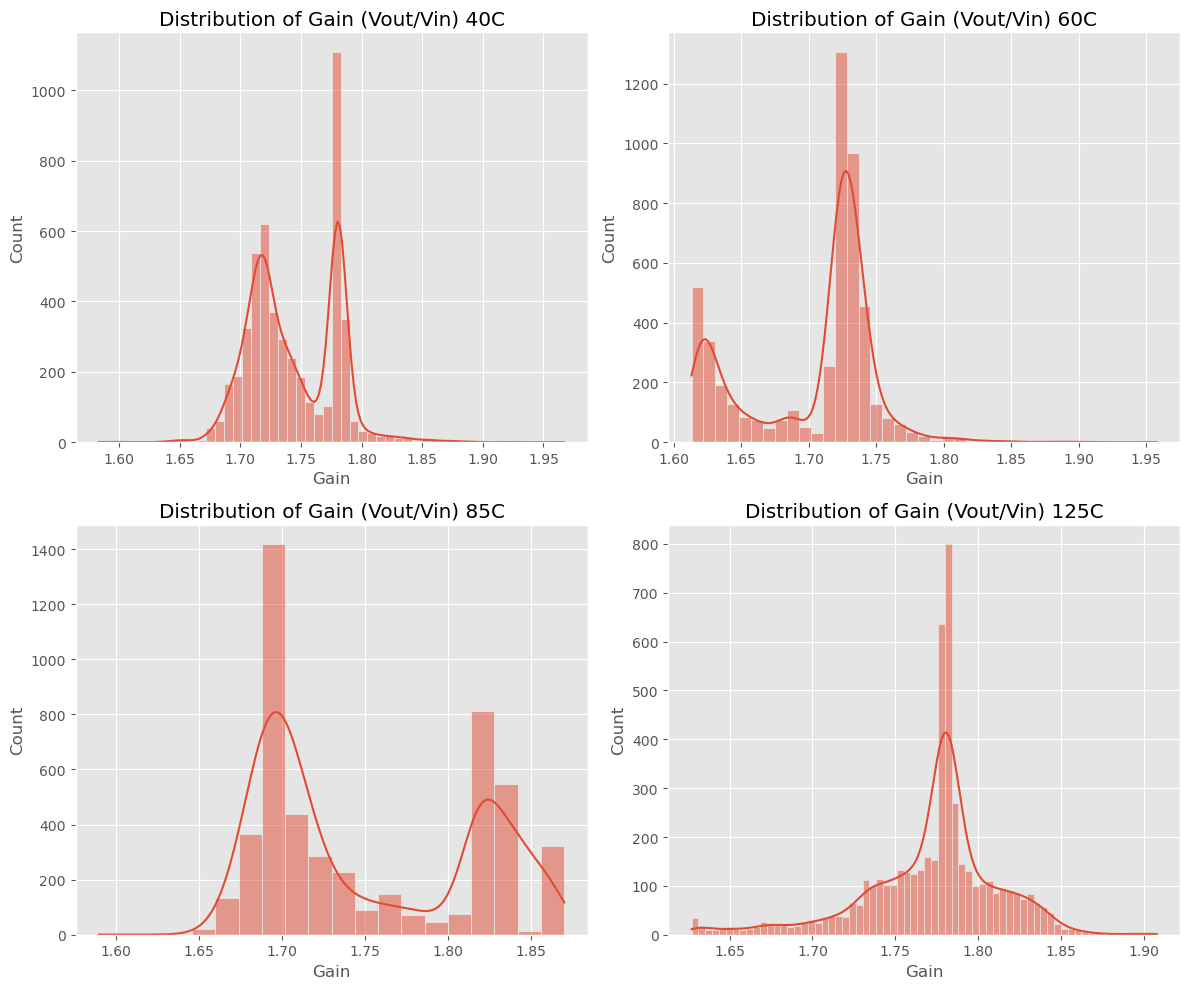

In [70]:
plt.figure(figsize=(12,10))

gain_cols = [
    'Gain (Vout/Vin) 40C',
    'Gain (Vout/Vin) 60C',
    'Gain (Vout/Vin) 85C',
    'Gain (Vout/Vin) 125C'
]

for i, col in enumerate(gain_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Gain")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


**Show the boxplot for R1, R2 and Gain.**

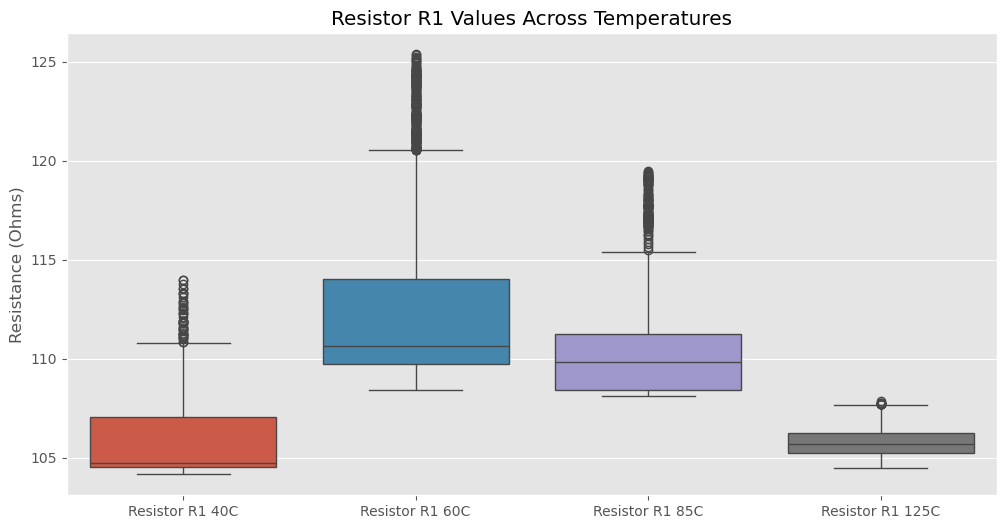

In [71]:
plt.figure(figsize=(12,6))

sns.boxplot(
    data=df[['Resistor R1 40C',
             'Resistor R1 60C',
             'Resistor R1 85C',
             'Resistor R1 125C']]
)

plt.title("Resistor R1 Values Across Temperatures")
plt.ylabel("Resistance (Ohms)")
plt.show()


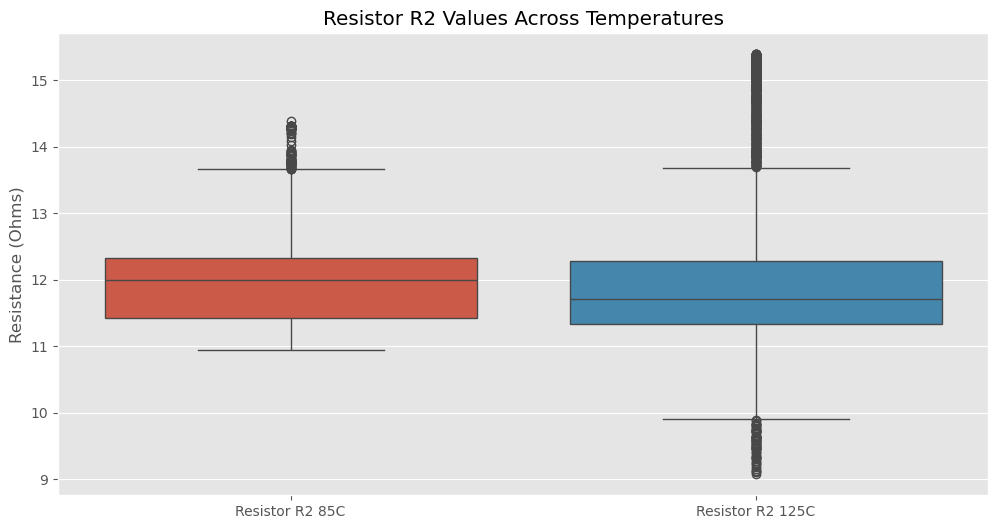

In [72]:
plt.figure(figsize=(12,6))

sns.boxplot(
    data=df[['Resistor R2 85C',
             'Resistor R2 125C']]
)

plt.title("Resistor R2 Values Across Temperatures")
plt.ylabel("Resistance (Ohms)")
plt.show()


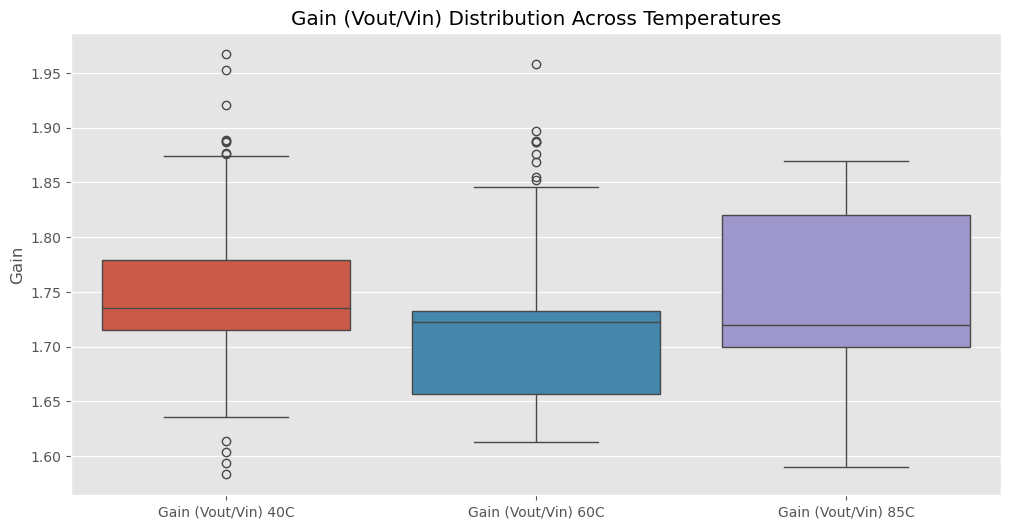

In [73]:
plt.figure(figsize=(12,6))

sns.boxplot(
    data=df[['Gain (Vout/Vin) 40C',
             'Gain (Vout/Vin) 60C',
             'Gain (Vout/Vin) 85C',]]
)

plt.title("Gain (Vout/Vin) Distribution Across Temperatures")
plt.ylabel("Gain")
plt.show()


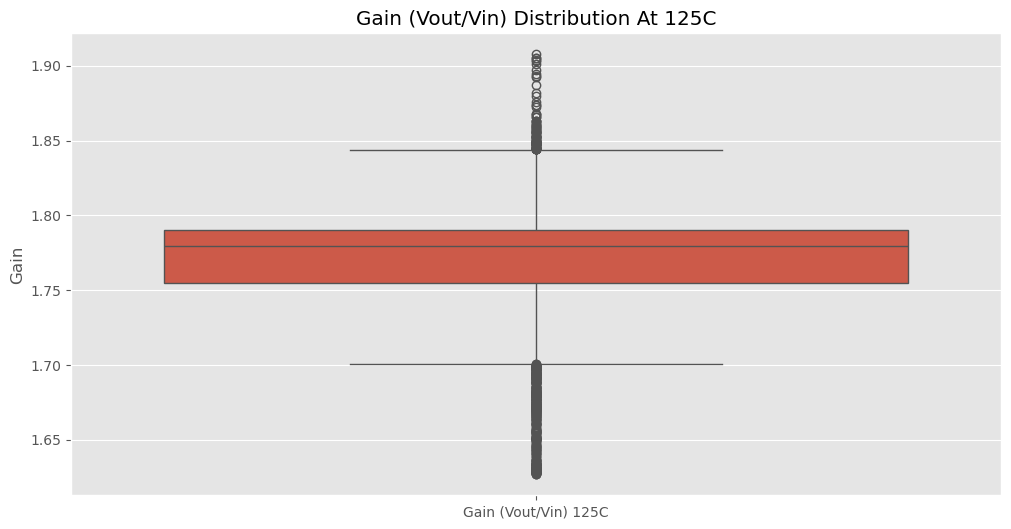

In [74]:
plt.figure(figsize=(12,6))

sns.boxplot(
    data=df[['Gain (Vout/Vin) 125C']]
)

plt.title("Gain (Vout/Vin) Distribution At 125C")
plt.ylabel("Gain")
plt.show()

**Show the heatmap for resistor R1.**

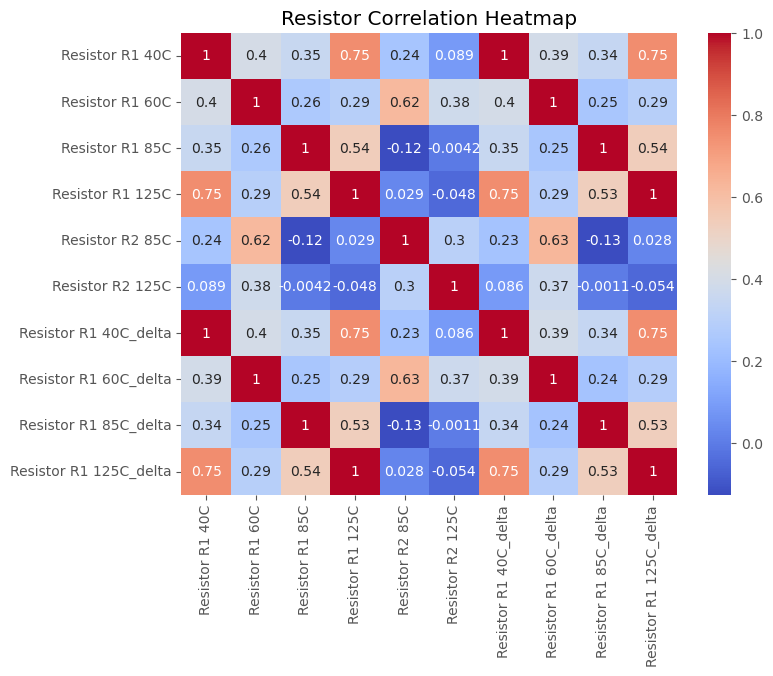

In [75]:
res_cols = [c for c in df.columns if "Resistor R1" in c or "Resistor R2" in c]
plt.figure(figsize=(8,6))
sns.heatmap(df[res_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Resistor Correlation Heatmap")
plt.show()



**The heatmap basically shows the correlation between parameter. Here I tried to find out how does R1 values are correlated to each other at different test temperature. For example, Resistor R1 at 40 C is strongly related to resistor R1 at 125C which shows 0.75. Which means when R1 increases at 40C, it also increases at 125C.**

**Show the linear drift of R1.**

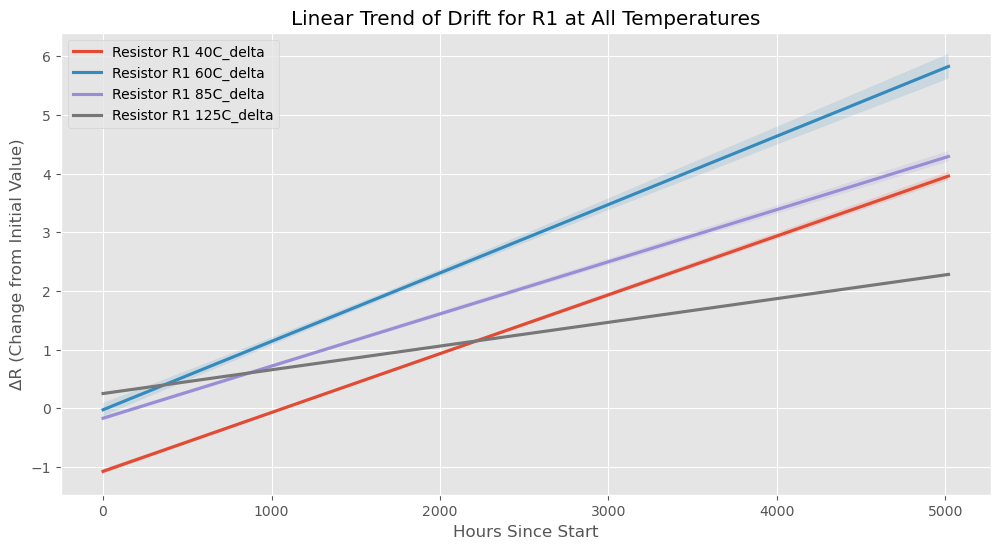

In [76]:
plt.figure(figsize=(12,6))

for col in ['Resistor R1 40C_delta','Resistor R1 60C_delta','Resistor R1 85C_delta','Resistor R1 125C_delta']:
    sns.regplot(x=df['hours_since_start'], y=df[col], scatter=False, label=col)

plt.legend()
plt.xlabel("Hours Since Start")
plt.ylabel("ΔR (Change from Initial Value)")
plt.title("Linear Trend of Drift for R1 at All Temperatures")
plt.show()


**Show the linear drift of R2.**

In [77]:
for col in ['Resistor R2 85C', 'Resistor R2 125C']:
    df[col + "_delta"] = df[col] - df[col].iloc[0]


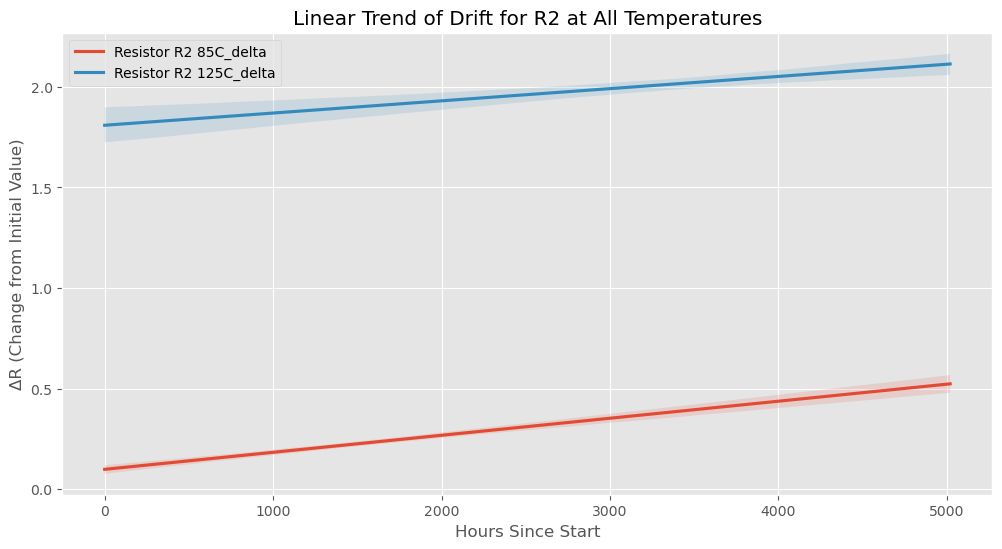

In [78]:
plt.figure(figsize=(12,6))

for col in ['Resistor R2 85C_delta','Resistor R2 125C_delta']:
    sns.regplot(x=df['hours_since_start'], y=df[col], scatter=False, label=col)

plt.legend()
plt.xlabel("Hours Since Start")
plt.ylabel("ΔR (Change from Initial Value)")
plt.title("Linear Trend of Drift for R2 at All Temperatures")
plt.show()


**Show the linear drift of Gain.**

In [79]:
for col in ['Gain (Vout/Vin) 40C','Gain (Vout/Vin) 60C','Gain (Vout/Vin) 85C','Gain (Vout/Vin) 125C']:
    df[col + "_delta"] = df[col] - df[col].iloc[0]


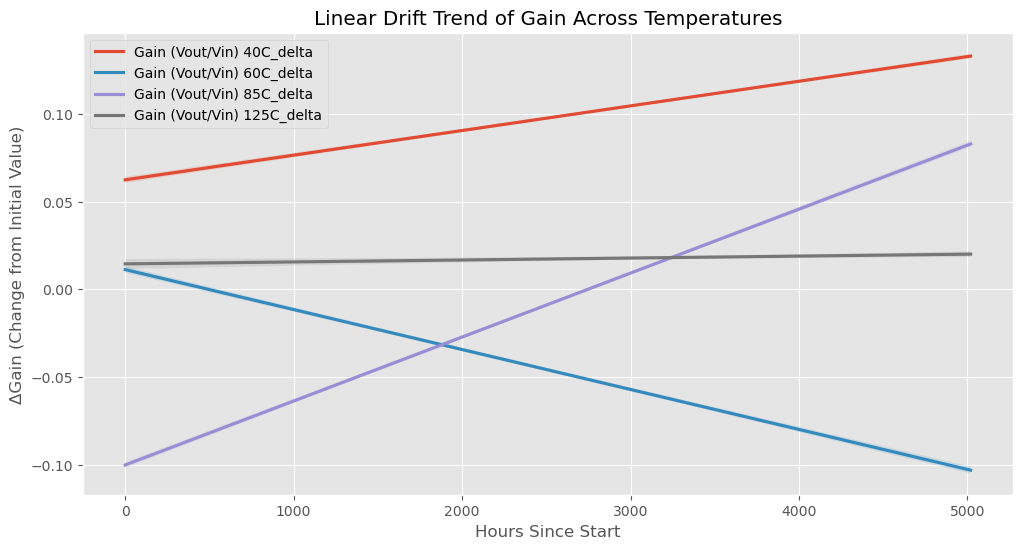

In [80]:
plt.figure(figsize=(12,6))

gain_delta_cols = [
    'Gain (Vout/Vin) 40C_delta',
    'Gain (Vout/Vin) 60C_delta',
    'Gain (Vout/Vin) 85C_delta',
    'Gain (Vout/Vin) 125C_delta'
]

for col in gain_delta_cols:
    sns.regplot(
        x=df['hours_since_start'], 
        y=df[col], 
        scatter=False, 
        label=col
    )

plt.legend()
plt.xlabel("Hours Since Start")
plt.ylabel("ΔGain (Change from Initial Value)")
plt.title("Linear Drift Trend of Gain Across Temperatures")
plt.show()


In [81]:
drift_rates = {}

for col in ['Resistor R1 40C_delta','Resistor R1 60C_delta','Resistor R1 85C_delta','Resistor R1 125C_delta']:
    temp_df = df[['hours_since_start', col]].dropna()   
    slope = np.polyfit(temp_df['hours_since_start'], temp_df[col], 1)[0]
    drift_rates[col] = slope

drift_rates


{'Resistor R1 40C_delta': np.float64(0.001002526572559518),
 'Resistor R1 60C_delta': np.float64(0.0011655603116448603),
 'Resistor R1 85C_delta': np.float64(0.0008887076972191808),
 'Resistor R1 125C_delta': np.float64(0.0004043974817967033)}

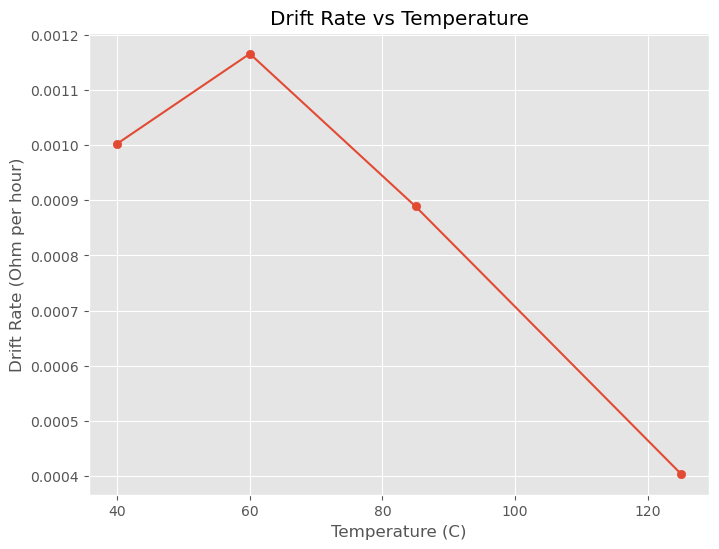

In [82]:
temps = [40, 60, 85, 125]
rates = list(drift_rates.values())

plt.figure(figsize=(8,6))
plt.scatter(temps, rates)
plt.plot(temps, rates)
plt.title("Drift Rate vs Temperature")
plt.xlabel("Temperature (C)")
plt.ylabel("Drift Rate (Ohm per hour)")
plt.show()


**Show the effect of cleaning in raw data.**

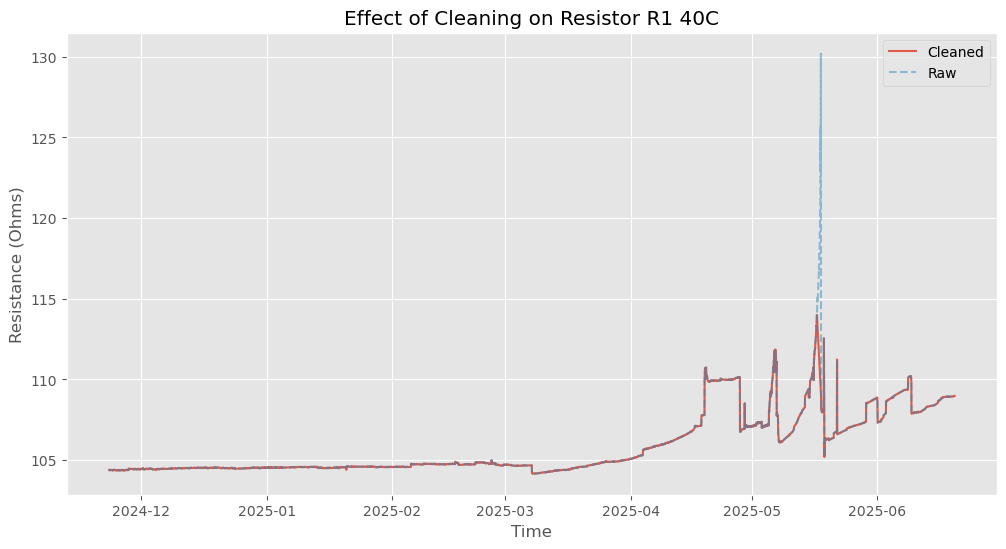

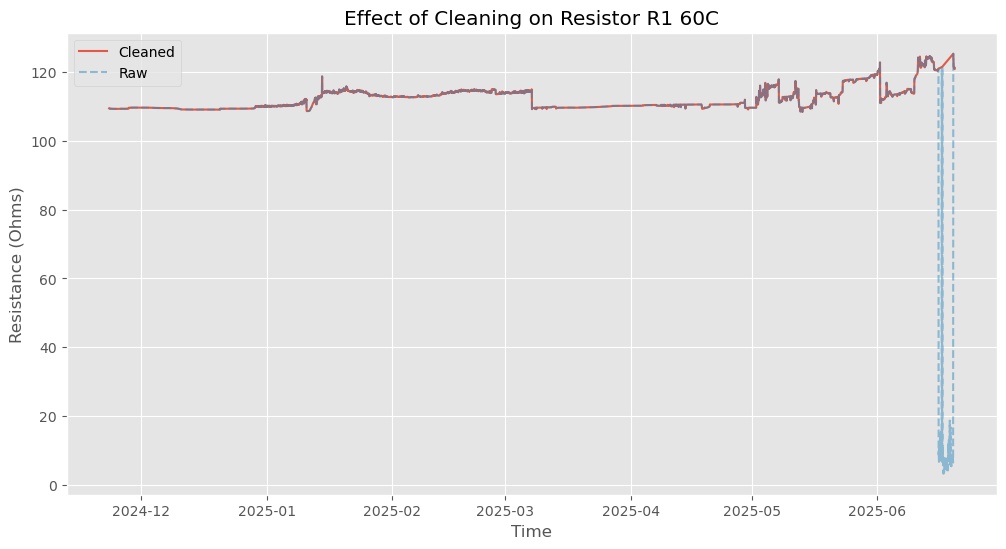

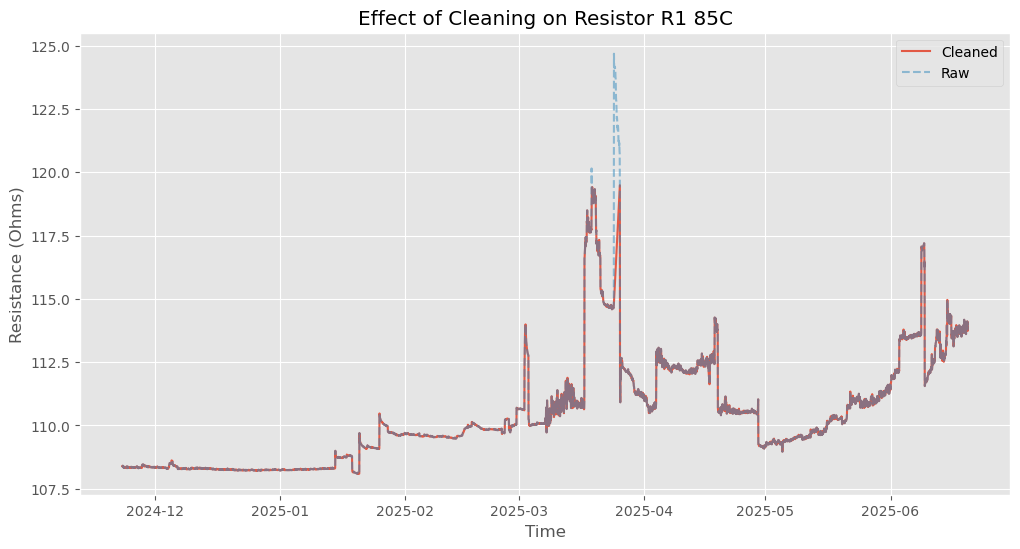

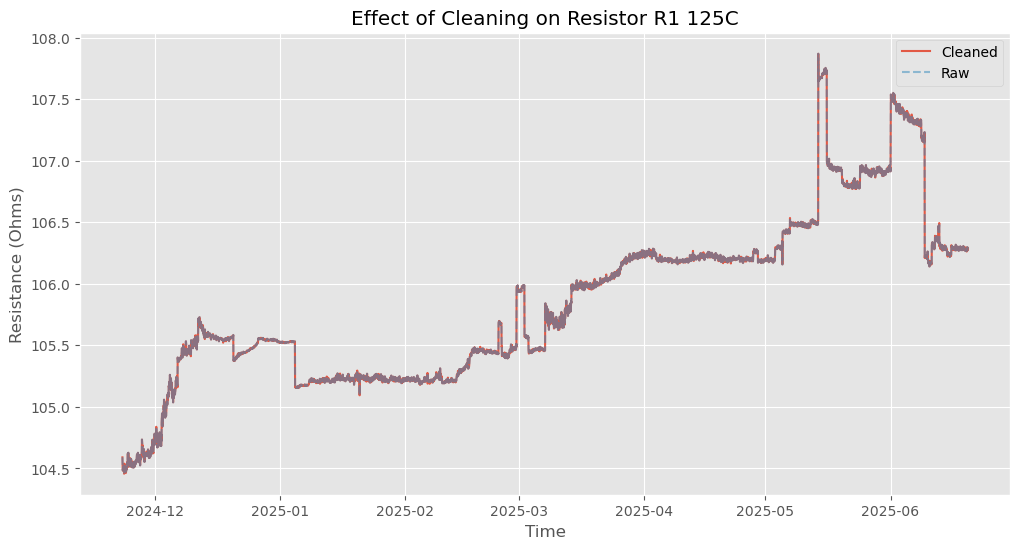

In [83]:
temps = ['Resistor R1 40C', 'Resistor R1 60C', 'Resistor R1 85C', 'Resistor R1 125C']

for col in temps:
    plt.figure(figsize=(12,6))
    plt.plot(df['timestamp'], df[col], label="Cleaned", alpha=0.9)
    plt.plot(df_raw['timestamp'], df_raw[col], label="Raw", linestyle='--', alpha=0.5)
    plt.legend()
    plt.title(f"Effect of Cleaning on {col}")
    plt.xlabel("Time")
    plt.ylabel("Resistance (Ohms)")
    plt.show()


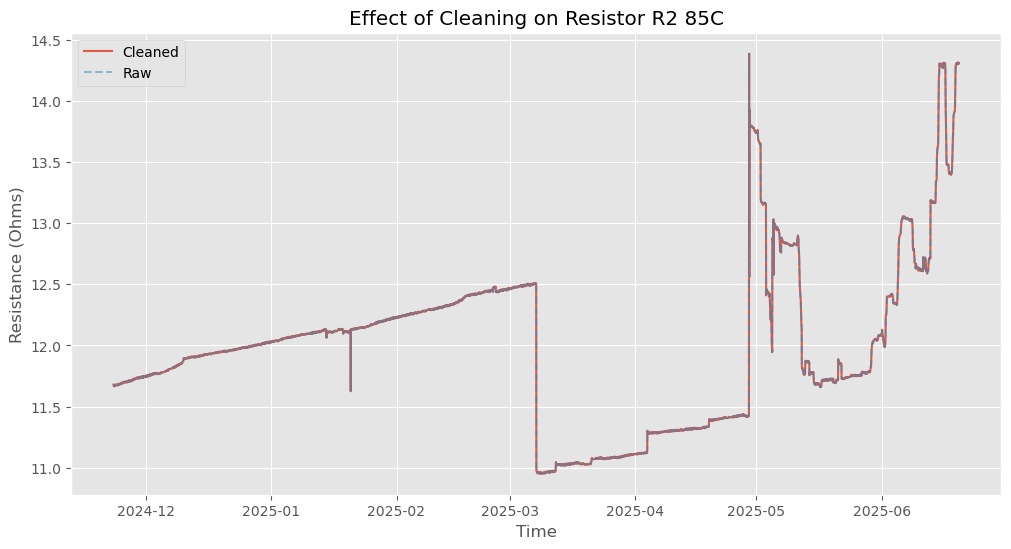

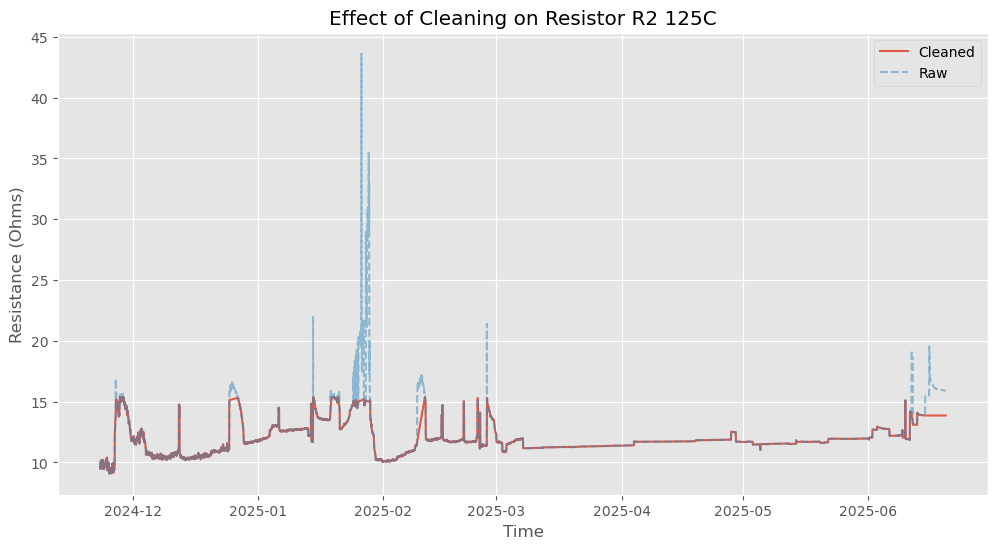

In [84]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%m/%d/%Y %H:%M:%S:%f")
df_raw['timestamp'] = pd.to_datetime(df_raw['timestamp'], format="%m/%d/%Y %H:%M:%S:%f")

temps_r2 = ['Resistor R2 85C', 'Resistor R2 125C']

for col in temps_r2:
    plt.figure(figsize=(12,6))
    plt.plot(df['timestamp'], df[col], label="Cleaned", alpha=0.9)
    plt.plot(df_raw['timestamp'], df_raw[col], label="Raw", linestyle='--', alpha=0.5)
    plt.legend()
    plt.title(f"Effect of Cleaning on {col}")
    plt.xlabel("Time")
    plt.ylabel("Resistance (Ohms)")
    plt.show()


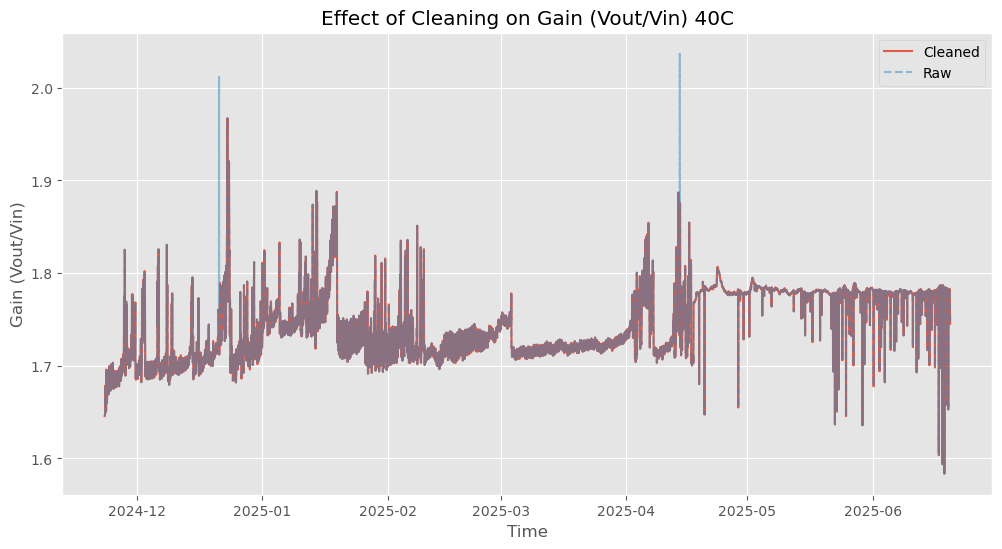

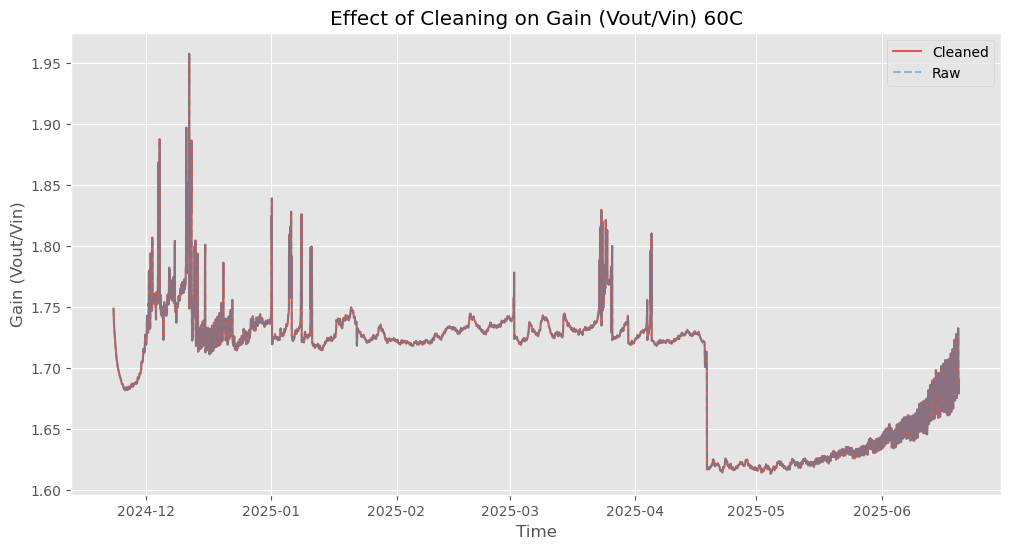

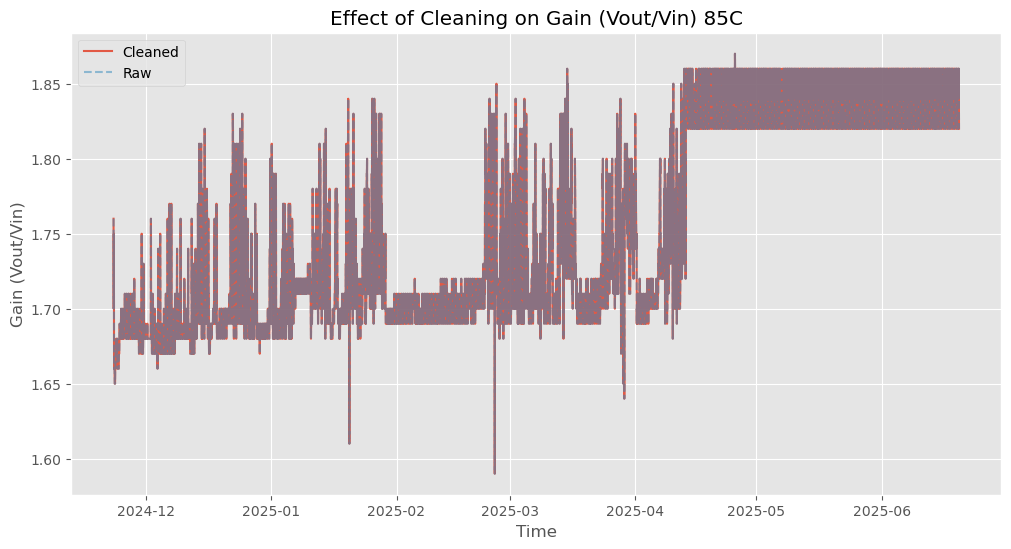

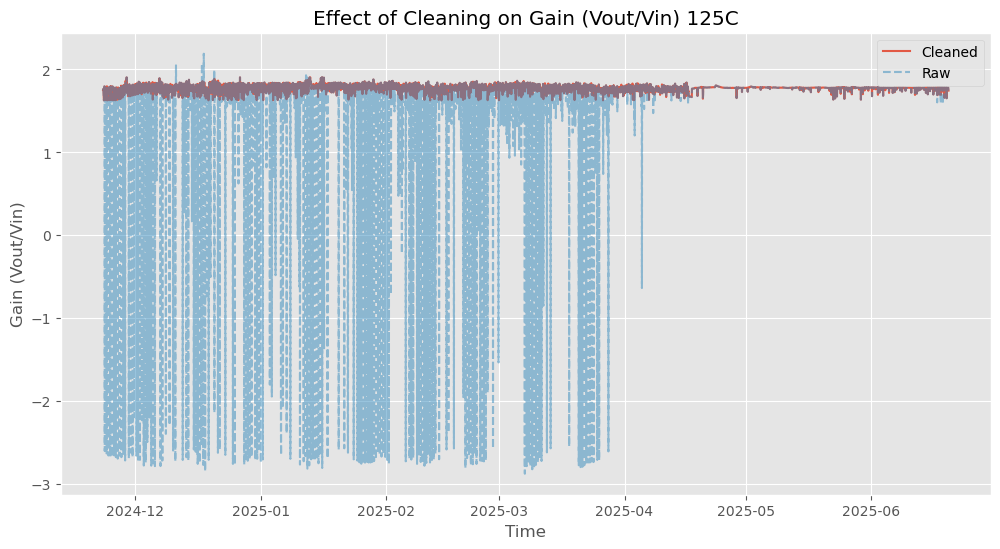

In [85]:
gain_cols = [
    'Gain (Vout/Vin) 40C',
    'Gain (Vout/Vin) 60C',
    'Gain (Vout/Vin) 85C',
    'Gain (Vout/Vin) 125C'
]

for col in gain_cols:
    plt.figure(figsize=(12,6))
    plt.plot(df['timestamp'], df[col], label="Cleaned", alpha=0.9)
    plt.plot(df_raw['timestamp'], df_raw[col], label="Raw", linestyle='--', alpha=0.5)
    plt.legend()
    plt.title(f"Effect of Cleaning on {col}")
    plt.xlabel("Time")
    plt.ylabel("Gain (Vout/Vin)")
    plt.show()

**The raw dataset has too many outliers as well as negative values. For a circuit gain or component values, negative values are unexpected. After data cleaning these outliers and negative values are removed and it smoothens out the dataset.**